### Load Data

In [1]:
# Identify the version of Python installed

!python --version

Python 3.10.14


In [2]:
# Read in the raw data

import pandas as pd

account_df = pd.read_csv("account.asc", sep=';')
card_df = pd.read_csv("card.asc", sep=';')
client_df = pd.read_csv("client.asc", sep=';')
disp_df = pd.read_csv("disp.asc", sep=';')
district_df = pd.read_csv("district.asc", sep=';')
loan_df = pd.read_csv("loan.asc", sep=';')
order_df = pd.read_csv("order.asc", sep=';')
trans_df = pd.read_csv("trans.asc", sep=';')

/tmp/ipykernel_29241/2146347786.py:12: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  trans_df = pd.read_csv("trans.asc", sep=';')


### Define Helper Functions

In [3]:
# Define function to format the date
def format_date(df,date_column):
    df["YY"] = df[date_column].astype(str).str.slice(0,2)
    df["MM"] = df[date_column].astype(str).str.slice(2,4)
    df["DD"] = df[date_column].astype(str).str.slice(4,6)
    df["string_date"] = "19" + df["YY"] + "-" + df["MM"] + "-" + df["DD"]
    df[str(date_column + "_formatted")] = pd.to_datetime(df["string_date"], format='%Y-%m-%d')
    df.drop(["YY","MM","DD","string_date"], axis = 1, inplace=True)
    return df

In [4]:
# Define function to separate gender from age in the birth number
def process_birth_number(column):
    target = column['birth_number']
    if target // 100 % 100 > 50:
        column['gender'] = "F" 
    else:
        column['gender'] = "M"
    column['age'] = 99 - (target // 10000)
    return column

### Explore Accounts

In [5]:
account_df = format_date(df=account_df, date_column="date")
account_df.head()

,account_id,district_id,frequency,date,date_formatted
0,576,55,POPLATEK MESICNE,930101,1993-01-01
1,3818,74,POPLATEK MESICNE,930101,1993-01-01
2,704,55,POPLATEK MESICNE,930101,1993-01-01
3,2378,16,POPLATEK MESICNE,930101,1993-01-01
4,2632,24,POPLATEK MESICNE,930102,1993-01-02


In [6]:
# List the number of accounts by year of creation
account_df["date_formatted"].dt.year.value_counts()

date_formatted
1996    1363
1993    1139
1997     898
1995     661
1994     439
Name: count, dtype: int64

### Explore Cards

In [7]:
# Format the date
card_df = format_date(df=card_df, date_column="issued")
card_df.head()

,card_id,disp_id,type,issued,issued_formatted
0,1005,9285,classic,931107 00:00:00,1993-11-07
1,104,588,classic,940119 00:00:00,1994-01-19
2,747,4915,classic,940205 00:00:00,1994-02-05
3,70,439,classic,940208 00:00:00,1994-02-08
4,577,3687,classic,940215 00:00:00,1994-02-15


In [8]:
# List the number of cards by year of creation
card_df["issued_formatted"].dt.year.value_counts()

issued_formatted
1998    449
1997    242
1996    116
1995     63
1994     21
1993      1
Name: count, dtype: int64

In [9]:
# List the number of cards by type
card_df["type"].value_counts()

type
classic    659
junior     145
gold        88
Name: count, dtype: int64

### Explore Clients

In [10]:
# Apply function to separate gender from age in the birth number
client_df = client_df.apply(process_birth_number, axis = 1)
client_df.head()

,client_id,birth_number,district_id,gender,age
0,1,706213,18,F,29
1,2,450204,1,M,54
2,3,406009,1,F,59
3,4,561201,5,M,43
4,5,605703,5,F,39


In [11]:
client_df["age"].describe()

count    5369.000000
mean       45.801639
std        17.282283
min        12.000000
25%        31.000000
50%        45.000000
75%        59.000000
max        88.000000
Name: age, dtype: float64

### Explore Disposition

In [12]:
# Each record relates together a client with an account (i.e., rights of client to operate accounts)
disp_df.head()

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [13]:
# Most clients are owners of their account rather than a disponent
disp_df["type"].value_counts()

type
OWNER        4500
DISPONENT     869
Name: count, dtype: int64

### Explore Districts (i.e., Demographic Data)

In [14]:
district_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [15]:
district_df.rename(columns={"A1": "District_code",
                            "A2": "District_name",
                            "A3": "Region",
                            "A4": "Number_of_inhabitants",
                            "A5": "Municipalities_lt_499",
                            "A6": "Municipalities_500_to_1999",
                            "A7": "Municipalities_2000_9999",
                            "A8": "Municipalities_gt_10000",
                            "A9": "Number_of_cities",
                            "A10": "Ratio_of_Urban_Inhabitants",
                            "A11": "Average_Salary",
                            "A12": "Unemployment_rate_1995",
                            "A13": "Unemployment_rate_1996",
                            "A14": "Number_of_entrepreneurs_per_1000",
                            "A15": "Number_of_crimes_1995",
                            "A16": "Number_of_crimes_1996"},
                   inplace=True)

In [16]:
district_df.head()

,District_code,District_name,Region,Number_of_inhabitants,Municipalities_lt_499,Municipalities_500_to_1999,Municipalities_2000_9999,Municipalities_gt_10000,Number_of_cities,Ratio_of_Urban_Inhabitants,Average_Salary,Unemployment_rate_1995,Unemployment_rate_1996,Number_of_entrepreneurs_per_1000,Number_of_crimes_1995,Number_of_crimes_1996
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


### Explore Loans

In [17]:
loan_df = format_date(df=loan_df, date_column="date")

In [18]:
loan_df["status"].value_counts()
# 'A' stands for contract finished, no problems
# 'B' stands for contract finished, loan not payed
# 'C' stands for running contract, OK so far
# 'D' stands for running contract, client in debt

status
C    403
A    203
D     45
B     31
Name: count, dtype: int64

In [19]:
loan_df["default_or_likely_default"] = loan_df["status"].isin(['D','B'])

In [20]:
loan_df.head()

,loan_id,account_id,date,amount,duration,payments,status,date_formatted,default_or_likely_default
0,5314,1787,930705,96396,12,8033.0,B,1993-07-05,True
1,5316,1801,930711,165960,36,4610.0,A,1993-07-11,False
2,6863,9188,930728,127080,60,2118.0,A,1993-07-28,False
3,5325,1843,930803,105804,36,2939.0,A,1993-08-03,False
4,7240,11013,930906,274740,60,4579.0,A,1993-09-06,False


### Explore Orders

In [21]:
order_df.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,


In [22]:
order_df["k_symbol"].value_counts()
# 'POJISTNE' stands for insurance payment
# 'SIPO' stands for household payment
# 'LEASING' stands for leasing
# 'UVER' stands for loan payment

k_symbol
SIPO        3502
            1379
UVER         717
POJISTNE     532
LEASING      341
Name: count, dtype: int64

In [23]:
# Subset just order that are loan payments
loan_payments_df = order_df[(order_df["k_symbol"] == "UVER")]

# Feature engineering - sum up all loan payments by account
loan_payments_by_account_df = loan_payments_df[["account_id","amount"]].groupby('account_id').sum().reset_index()
loan_payments_by_account_df.rename(columns={'amount': 'sum_of_loan_payments'}, inplace=True)
loan_payments_by_account_df.head()

,account_id,sum_of_loan_payments
0,2,3372.7
1,19,2523.2
2,25,2523.2
3,37,5307.5
4,38,2306.8


### Explore Transactions

In [24]:
trans_df = format_date(df=trans_df, date_column="date")
trans_df.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,date_formatted
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN,1993-01-01
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN,1993-01-01
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN,1993-01-01
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN,1993-01-01
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN,1993-01-02


In [25]:
# Feature engineering - count up the number of all transactions by account
trans_counts_by_account_df = trans_df[["account_id","amount"]].groupby('account_id').count().reset_index()
trans_counts_by_account_df.rename(columns={'amount': 'count_transactions'}, inplace=True)

# Subset just transactions that are withdrawals
trans_withdrawal_df = trans_df[(trans_df["type"] == "VYDAJ")]

# Feature engineering - count withdrawals
trans_count_withdrawal_df = trans_withdrawal_df[["account_id","amount"]].groupby('account_id').count().reset_index()
trans_count_withdrawal_df.rename(columns={'amount': 'count_withdrawals'}, inplace=True)

# Feature engineering - max withdrawals
trans_max_withdrawal_df = trans_withdrawal_df[["account_id","amount"]].groupby('account_id').max().reset_index()
trans_max_withdrawal_df.rename(columns={'amount': 'max_withdrawal'}, inplace=True)

# Summarize transactions
trans_summary_df = trans_counts_by_account_df.merge(trans_count_withdrawal_df, on='account_id', how='left').merge(trans_max_withdrawal_df, on='account_id', how='left')
trans_summary_df.head()

,account_id,count_transactions,count_withdrawals,max_withdrawal
0,1,239,137,7500.0
1,2,478,305,42000.0
2,3,117,71,7400.0
3,4,186,121,5250.0
4,5,84,49,5100.0


### Join Datasets

In [26]:
# Let's rename some columns in the source data and drop unnecessary columns (e.g. raw dates)

account_df.rename(columns={'district_id': 'account_district_id', 
                           'date_formatted': 'account_date_formatted'}, inplace=True)
account_df.drop(columns=['date'], inplace=True)

client_df.rename(columns={'district_id': 'client_district_id'}, inplace=True)
client_df.drop(columns=['birth_number'], inplace=True)

card_df.rename(columns={'type': 'card_type',
                       'issued_formatted': 'card_issued_formatted'}, inplace=True)
card_df.drop(columns=['issued'], inplace=True)

loan_df.rename(columns={'date_formatted': 'loan_date_formatted',
                        'amount': 'loan_amount',
                        'duration': 'loan_duration',
                        'payments': 'loan_payments'}, inplace=True)
loan_df.drop(columns=['date'], inplace=True)

In [27]:
# Left join dispositions with accounts and clients
# Each record in disposition relates together a client with an account (i.e. the rights of clients to operate an account)
disp_account_client_df = disp_df.merge(account_df, on='account_id', how='left').merge(client_df, on='client_id', how='left')

In [28]:
# Left join the result with the cards - note that not every disposition (account and client relation) has a card
disp_account_client_card_df = disp_account_client_df.merge(card_df, on='disp_id', how='left')

In [29]:
# Subset just the account owners
account_owners = disp_account_client_card_df[disp_account_client_card_df["type"] == "OWNER"]

In [30]:
# Left join the account owners to the loan data
loan_account_owners = loan_df.merge(account_owners, on='account_id', how='left')

In [31]:
# Left join districts to the loan data
loan_account_owners_district = loan_account_owners.merge(district_df, left_on='account_district_id', right_on='District_code', how='left')

In [32]:
# left join the summarized transactions to the loan data
loan_account_owners_district_trans = loan_account_owners_district.merge(trans_summary_df, on='account_id', how='left')

In [33]:
# Left join the summarized orders (i.e. the loan payments) to the loan data
final_merged_df = loan_account_owners_district_trans.merge(loan_payments_by_account_df, on='account_id', how='left')

In [34]:
# We have 682 loans, where each record describes a loan granted for a given account
final_merged_df.shape

(682, 40)

In [35]:
# Check out the final merged data frame
final_merged_df.head()

,loan_id,account_id,loan_amount,loan_duration,loan_payments,status,loan_date_formatted,default_or_likely_default,disp_id,client_id,...,Average_Salary,Unemployment_rate_1995,Unemployment_rate_1996,Number_of_entrepreneurs_per_1000,Number_of_crimes_1995,Number_of_crimes_1996,count_transactions,count_withdrawals,max_withdrawal,sum_of_loan_payments
0,5314,1787,96396,12,8033.0,B,1993-07-05,True,2166,2166,...,9650,3.38,3.67,100,2985,2804,403,235,64700.0,8033.2
1,5316,1801,165960,36,4610.0,A,1993-07-11,False,2181,2181,...,8369,1.79,2.31,117,2854,2618,633,423,54300.0,4610.0
2,6863,9188,127080,60,2118.0,A,1993-07-28,False,11006,11314,...,8390,2.28,2.89,132,2080,2122,605,378,14800.0,2118.3
3,5325,1843,105804,36,2939.0,A,1993-08-03,False,2235,2235,...,8754,3.83,4.31,137,3804,3868,462,297,15600.0,2938.7
4,7240,11013,274740,60,4579.0,A,1993-09-06,False,13231,13539,...,12541,0.29,0.43,167,85677,99107,571,395,60900.0,4579.0


In [36]:
# Print out all the columns in the final merged data frame
for col in final_merged_df.columns:
    print(col)

loan_id
account_id
loan_amount
loan_duration
loan_payments
status
loan_date_formatted
default_or_likely_default
disp_id
client_id
type
account_district_id
frequency
account_date_formatted
client_district_id
gender
age
card_id
card_type
card_issued_formatted
District_code
District_name
Region
Number_of_inhabitants
Municipalities_lt_499
Municipalities_500_to_1999
Municipalities_2000_9999
Municipalities_gt_10000
Number_of_cities
Ratio_of_Urban_Inhabitants
Average_Salary
Unemployment_rate_1995
Unemployment_rate_1996
Number_of_entrepreneurs_per_1000
Number_of_crimes_1995
Number_of_crimes_1996
count_transactions
count_withdrawals
max_withdrawal
sum_of_loan_payments


### Visualize Features related to Loan Defaults

In [37]:
# Import visualization modules
import matplotlib.pyplot as plt 
import seaborn as sns
import folium as folium

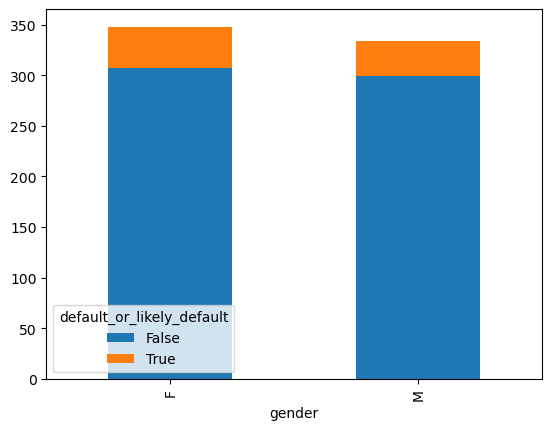

In [38]:
# Relationship between the Gender of Account Owner and Default Status - there is no apparent pattern
pd.crosstab(final_merged_df['gender'], final_merged_df['default_or_likely_default']).plot.bar(stacked=True);

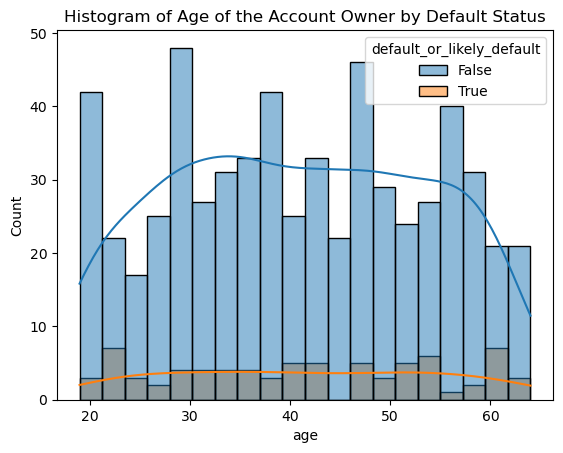

In [39]:
# Histogram of Age of the Account Owner by Default Status - there is no apparent pattern
import seaborn as sns
sns.histplot(data=final_merged_df, x="age", hue="default_or_likely_default", bins=20, kde=True) \
.set_title('Histogram of Age of the Account Owner by Default Status');

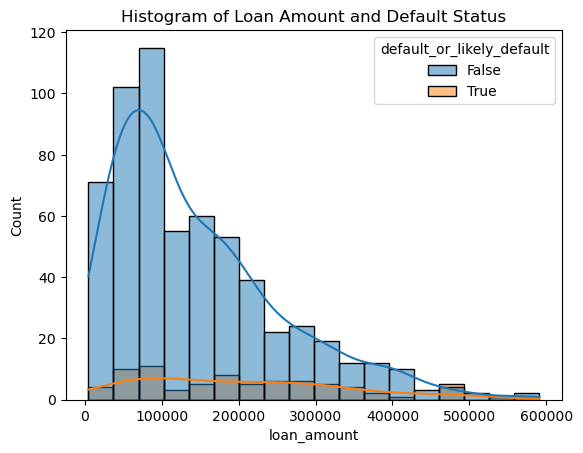

In [40]:
# Histogram of Loan Amount and Default Status - higher loan amounts are more associated with default
sns.histplot(data=final_merged_df, x="loan_amount", hue="default_or_likely_default", kde=True) \
.set_title('Histogram of Loan Amount and Default Status');

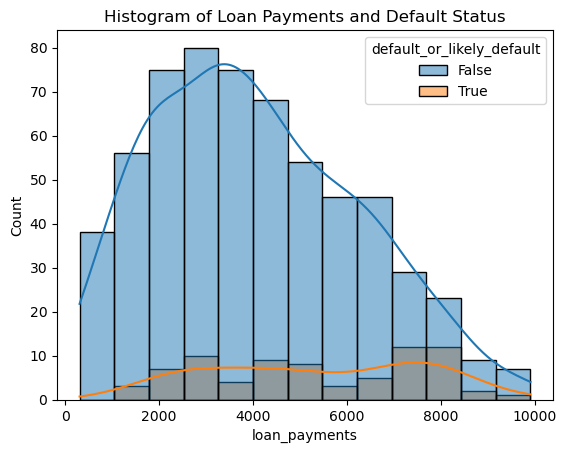

In [41]:
# Histogram of Loan Payments and Default Status - higher loan payments are more associated with default
sns.histplot(data=final_merged_df, x="loan_payments", hue="default_or_likely_default", kde=True) \
.set_title('Histogram of Loan Payments and Default Status');

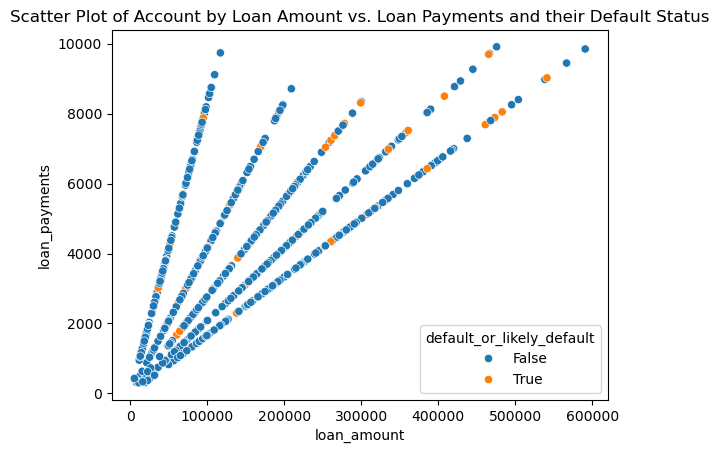

In [42]:
sns.scatterplot(data=final_merged_df, x = "loan_amount", y = "loan_payments", hue = "default_or_likely_default") \
.set_title('Scatter Plot of Account by Loan Amount vs. Loan Payments and their Default Status');

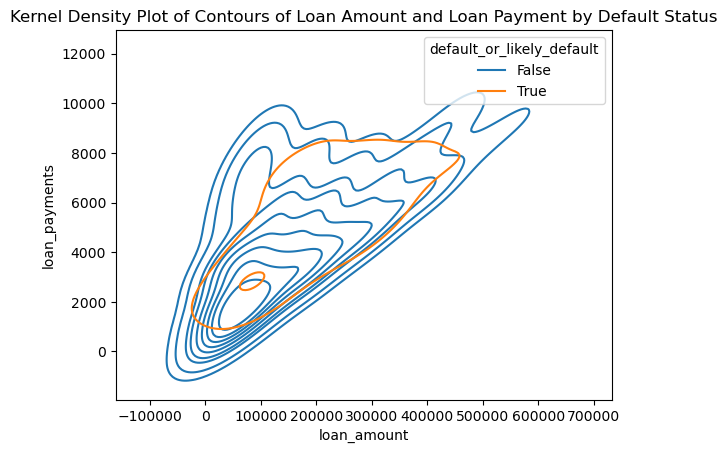

In [43]:
# Kernel Density Plot of Contours of Loan Amount and Loan Payment by Default Status
# Defaulters tend to have higher loan amounts and loan payments
sns.kdeplot(data=final_merged_df, x="loan_amount", y="loan_payments", hue="default_or_likely_default", fill=False) \
.set_title('Kernel Density Plot of Contours of Loan Amount and Loan Payment by Default Status');

default_or_likely_default  card_type
False                      classic      130
                           junior        20
                           gold          15
True                       classic        3
                           gold           1
                           junior         1
Name: count, dtype: int64


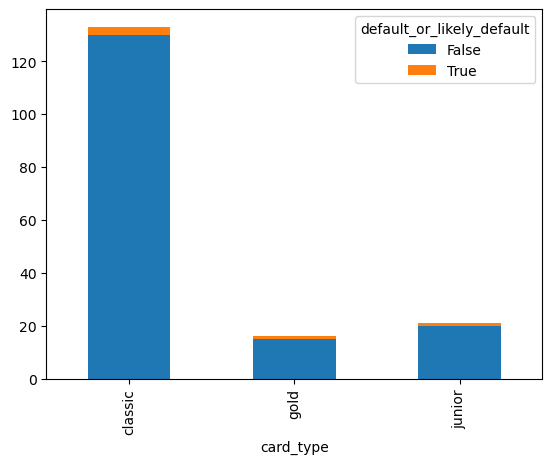

In [44]:
# Relationship between Card Type and Default Status
# Junior cards may have a higher default rate, but we have very limited data on credit cards
print(final_merged_df.groupby(by='default_or_likely_default')['card_type'].value_counts())
pd.crosstab(final_merged_df['card_type'], final_merged_df['default_or_likely_default']).plot.bar(stacked=True);

/tmp/ipykernel_29241/3469580956.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");


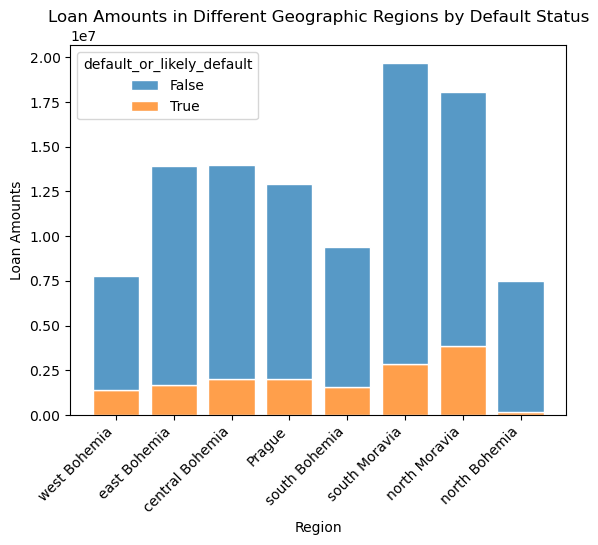

In [45]:
# Different regions of the Czech Republic have different loan default rates
ax = sns.histplot(
    final_merged_df,
    x='Region',
    weights='loan_amount',
    hue='default_or_likely_default',
    multiple='stack',
    edgecolor='white',
    shrink=0.8
)
ax.set_title('Loan Amounts in Different Geographic Regions by Default Status')
ax.set_ylabel('Loan Amounts')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");

In [46]:
# Display a map of the Czech Republic
FoliumFigure = folium.Figure(width=800, height=500)
CzechMap = folium.Map(location=[50,15],
                      titles="openstreetmap",
                      scrollWheelZoom=False,
                      dragging=False,
                      zoom_control=False,
                      zoom_start=7,
                      min_zoom=7,
                      max_zoom=7,
                      max_bounds = True).add_to(FoliumFigure)
CzechMap

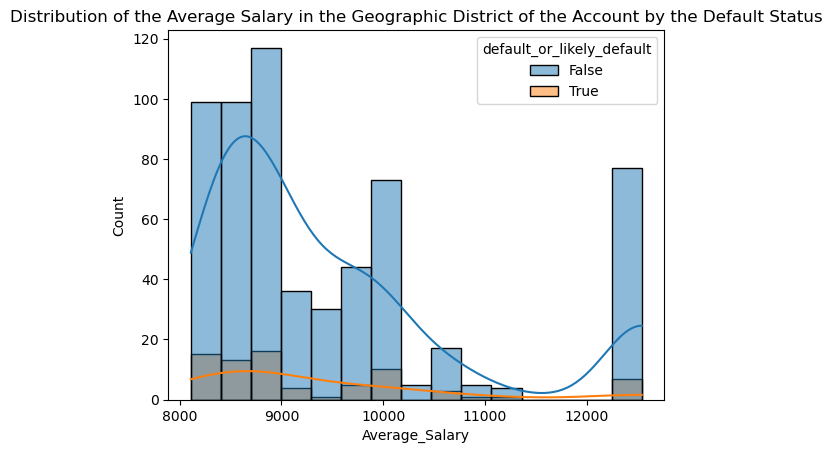

In [47]:
# Relationship between Average Salary of Geographic District and Default Status
# Account owners from lower income regions are more likely to default than those from higher income regions
sns.histplot(data=final_merged_df, x="Average_Salary", hue="default_or_likely_default", kde=True) \
.set_title('Distribution of the Average Salary in the Geographic District of the Account by the Default Status');

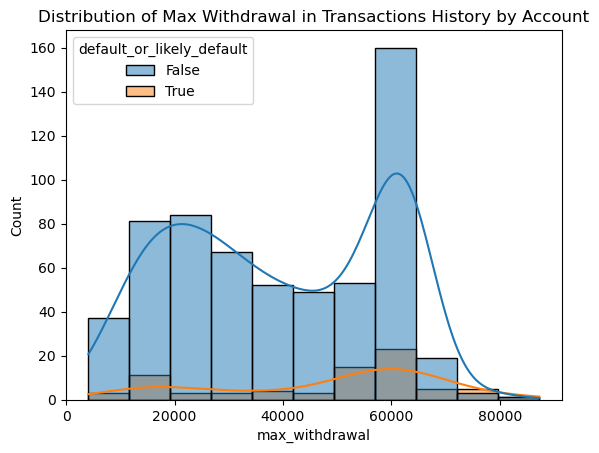

In [48]:
# Account owners with high maximum withdrawals in their history of transactions are more likely to default
sns.histplot(data=final_merged_df, x="max_withdrawal", hue="default_or_likely_default", kde=True) \
.set_title('Distribution of Max Withdrawal in Transactions History by Account');

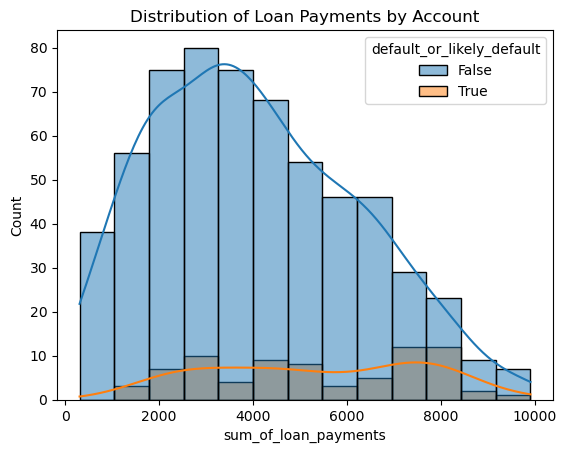

In [49]:
# Account owners making higher loan payments (likely due to higher loans) are more likely to default
sns.histplot(data=final_merged_df, x="sum_of_loan_payments", hue="default_or_likely_default", kde=True) \
.set_title('Distribution of Loan Payments by Account');

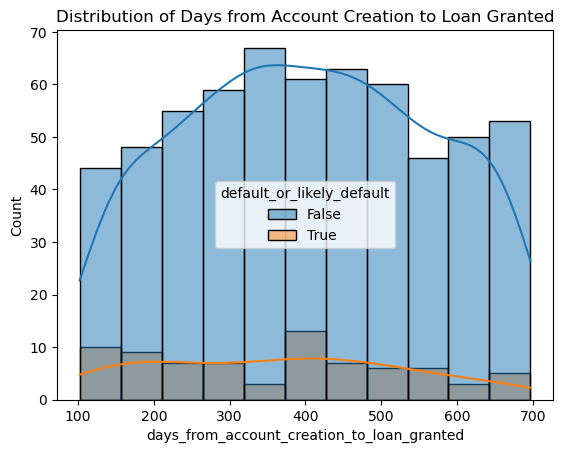

In [50]:
# Engineer a new feature of the days from account creation to loan granted
final_merged_df["days_from_account_creation_to_loan_granted"] = (final_merged_df["loan_date_formatted"] - final_merged_df["account_date_formatted"]).dt.days
sns.histplot(data=final_merged_df, x="days_from_account_creation_to_loan_granted", hue="default_or_likely_default", kde=True) \
.set_title('Distribution of Days from Account Creation to Loan Granted');